## Example 6-1 Microreactor ODE model  A + B -> C

$$2NOCl \rightarrow 2NO + Cl_2$$\
$$A \rightarrow B + \frac{C}{2}$$\
$$\text{Initial Values:  } F_{A_0}=22.6 \mu mol/s=2.26\times 10^{-5}\,mol/s  \:
T=698\, K \: E_a=24000\, cal/mol \:v_0=\frac{F_{A_0}}{C_{t_0}}$$

$$\frac{dFA}{dV}=r_A$$\
$$\frac{dF_B}{dV} =r_B$$\
$$\frac{dF_C}{dV} =r_C$$\

$$r_A=-k  C_A^2$$\
$$C_A=\frac{F_A}{F_T}C_{T0}$$\
$$C_{T0}=\frac{P_0}{R\,T_0}=\frac{1641\,kPa}{\left(8.314\frac{kPa\,L}{mol K}\right)698\,K}$$\

$$k=0.29\exp{\left[\frac{E_a}{R}\left(\frac{1}{500}-\frac{1}{T}\right)\right]}\frac{L}{mol\,s}$$\
$$r_B=-r_A$$\
$$r_C=-\frac{r_A}{2}$$   \                 

The reactor volume of one channel is $1\times 10^{-5}L$ 


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt

In [3]:
#This function is to return the values of the 2 derivatives for the reaction A => B with first order kinetics
def  ODEfun(V,Yfuncvec):#fun(t,y) and return dy/dt
       
    Fa= Yfuncvec[0]
    Fb= Yfuncvec[1]
    Fc= Yfuncvec[2]
    
    #Explicit equations 
    T = 698 
    Ea = 24000
    P0=1641
    Cto = P0 / 8.314 / T 
    Ft = Fa + Fb + Fc 
    Ca = Cto * Fa / Ft 
    k=0.29 * np.exp(Ea/1.987* (1/500-1/T))     
    vo = Fao / Cto 
    Tau = V / vo 
    ra =-(k * Ca**2) 
    X = 1 -(Fa / Fao) 
    rb = -ra 
    rc = -(ra / 2) 
      
    #Differential equations
    dFadV = ra 
    dFbdV = rb 
    dFcdV = rc  
      
    dYfuncvecdV = [dFadV, dFbdV, dFcdV] 
    return dYfuncvecdV   

In [4]:
#test of function ODEfun.  This will return values of dFA/dV=rA and dFB/dV=-rA at a value of V
Fao = 2.26e-5
F0=[Fao,0,0]# Initial values for the N's 
tspan=(0,1e-5)# start and end of the integration

sol=ODEfun(0,F0)#Evaluates the derivatives at t=0s
print (sol)

[-21.9439731810448, 21.9439731810448, 10.9719865905224]


In [5]:
#test of solve_ivp function (python ODE solver from scipy library)

#The inputs to solve_ivp are the functions in ODEfun, the integration start&stop, 
#and the initial values of all the moles Ni
sol=solve_ivp(ODEfun,tspan,F0) 
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 32
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 6.78041611e-07, 1.80113058e-06, 4.53434666e-06,
       9.67379061e-06, 1.00000000e-05])
 t_events: None
        y: array([[2.26000000e-05, 1.53897787e-05, 1.04045702e-05, 6.52358441e-06,
        3.98880823e-06, 3.88015949e-06],
       [0.00000000e+00, 7.21022128e-06, 1.21954298e-05, 1.60764156e-05,
        1.86111918e-05, 1.87198405e-05],
       [0.00000000e+00, 3.60511064e-06, 6.09771491e-06, 8.03820780e-06,
        9.30559588e-06, 9.35992025e-06]])
 y_events: None


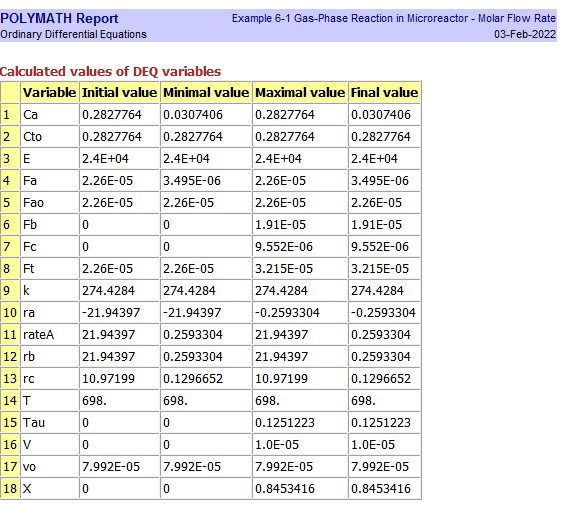

 Notice that we don't have agreement between POLYMATH and python! compare X and Fa at the final values.  For example Fa=3.495E-6 in POLYMATH but is 3.88015949e-06 using python!  Next look at the plot below.  The result is a wobbly line!  We have problems with the default solver RK

Text(0, 0.5, 'Molar Flowrate (kmol/s)')

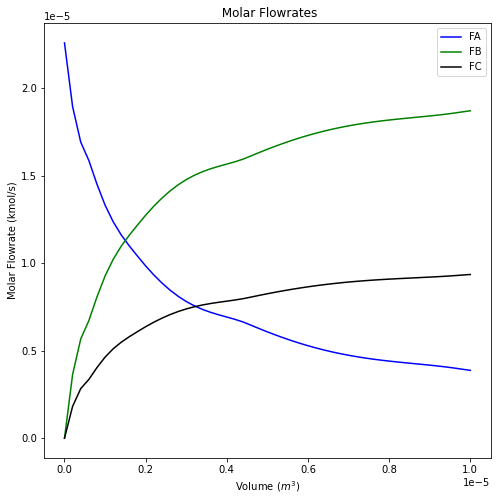

In [7]:
numrows=51
teval=np.linspace(tspan[0],tspan[1],numrows)
sol=solve_ivp(ODEfun,tspan,F0,t_eval=teval)
plt.figure(figsize=(8,8))

plt.subplot (1,1,1)
plt.plot(sol.t,sol.y[0],'b',label='FA')
plt.plot(sol.t,sol.y[1],'g',label='FB')
plt.plot(sol.t,sol.y[2],'k',label='FC')

plt.legend()
plt.title(' Molar Flowrates')
plt.xlabel('Volume $(m^3)$')
plt.ylabel('Molar Flowrate (kmol/s)')

# So we need to change from the default solver to another.  method='DOP853' works!

In [8]:
#test of solve_ivp function (python ODE solver from scipy library)

#The inputs to solve_ivp are the functions in ODEfun, the integration start&stop, 
#and the initial values of all the moles Ni
sol=solve_ivp(ODEfun,tspan,F0,method='DOP853') #for stiff eqns systems method='Radau', or 'BDF'  alternatively an old FORTRAN code  'LSODA'
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 62
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 6.78041611e-07, 1.74309507e-06, 4.30828985e-06,
       9.49120472e-06, 1.00000000e-05])
 t_events: None
        y: array([[2.26000000e-05, 1.46518802e-05, 1.01621439e-05, 6.20885149e-06,
        3.63268163e-06, 3.49525983e-06],
       [0.00000000e+00, 7.94811978e-06, 1.24378561e-05, 1.63911485e-05,
        1.89673184e-05, 1.91047402e-05],
       [0.00000000e+00, 3.97405989e-06, 6.21892805e-06, 8.19557426e-06,
        9.48365919e-06, 9.55237009e-06]])
 y_events: None


In [9]:
#Making a table of numbers including Equilibrium Conversion
T = 698 
Ea = 24000

P0=1641
Cto = P0 / 8.314 / T     
vo = Fao / Cto 
print('vo=',vo)
k=0.29 * np.exp(Ea/1.987* (1/500-1/T)) 
print('k=',k)

numrows=21
F0=[Fao,0,0]# Initial values for the N's 
tspan=(0,1e-5)# start and end of the integration

teval=np.linspace(tspan[0],tspan[1],numrows)

sol=solve_ivp(ODEfun,tspan,F0,t_eval=teval,method='DOP853')
FT=np.zeros(numrows)
CA=np.zeros(numrows)
CB=np.zeros(numrows)
CC=np.zeros(numrows)
XA=np.zeros(numrows)
rA=np.zeros(numrows)

# print a table
print('Solution ')
print('    V         FA        FB          FC        FT         CA          CB         CC         XA           rA   ')
print('  (m^3)    (kmol/s)  (kmol/s)   (kmol/s)   (kmol/s)  (kmol/m^3)  (kmol/m^3)  (kmol/m^3)           (kmol/m^3/s)  ')    

row=0
for row in range(numrows):
    
    FT[row]=sol.y[0,row]+sol.y[1,row]+sol.y[2,row]
    CA[row]=sol.y[0,row]/vo
    CB[row]=sol.y[1,row]/vo
    CC[row]=sol.y[2,row]/vo
    XA[row]=(sol.y[0,0]-sol.y[0,row])/sol.y[0,0]
    rA[row] = -k*CA[row]**2
   
    print('{:8.2e} {:10.3e} {:10.3e} {:10.3e} {:10.3e} {:10.3f}  {:10.3f} {:10.3f}  {:10.7f} {:12.3f}  '.format(sol.t[row],
                            sol.y[0,row],sol.y[1,row],sol.y[2,row],FT[row],CA[row],CB[row],CC[row],XA[row],rA[row] ))

vo= 7.992180816575259e-05
k= 274.42835813519713
Solution 
    V         FA        FB          FC        FT         CA          CB         CC         XA           rA   
  (m^3)    (kmol/s)  (kmol/s)   (kmol/s)   (kmol/s)  (kmol/m^3)  (kmol/m^3)  (kmol/m^3)           (kmol/m^3/s)  
0.00e+00  2.260e-05  0.000e+00  0.000e+00  2.260e-05      0.283       0.000      0.000   0.0000000      -21.944  
5.00e-07  1.598e-05  6.623e-06  3.311e-06  2.591e-05      0.200       0.083      0.041   0.2930413      -10.967  
1.00e-06  1.284e-05  9.764e-06  4.882e-06  2.748e-05      0.161       0.122      0.061   0.4320406       -7.079  
1.50e-06  1.088e-05  1.172e-05  5.860e-06  2.846e-05      0.136       0.147      0.073   0.5185421       -5.087  
2.00e-06  9.513e-06  1.309e-05  6.543e-06  2.914e-05      0.119       0.164      0.082   0.5790519       -3.888  
2.50e-06  8.489e-06  1.411e-05  7.056e-06  2.966e-05      0.106       0.177      0.088   0.6243807       -3.096  
3.00e-06  7.687e-06  1.491e-05  7.4

vo= 7.992180816575259e-05
k= 274.42835813519713


Text(0, 0.5, 'Reaction Rate, -rA ($mol/m^3/s$)')

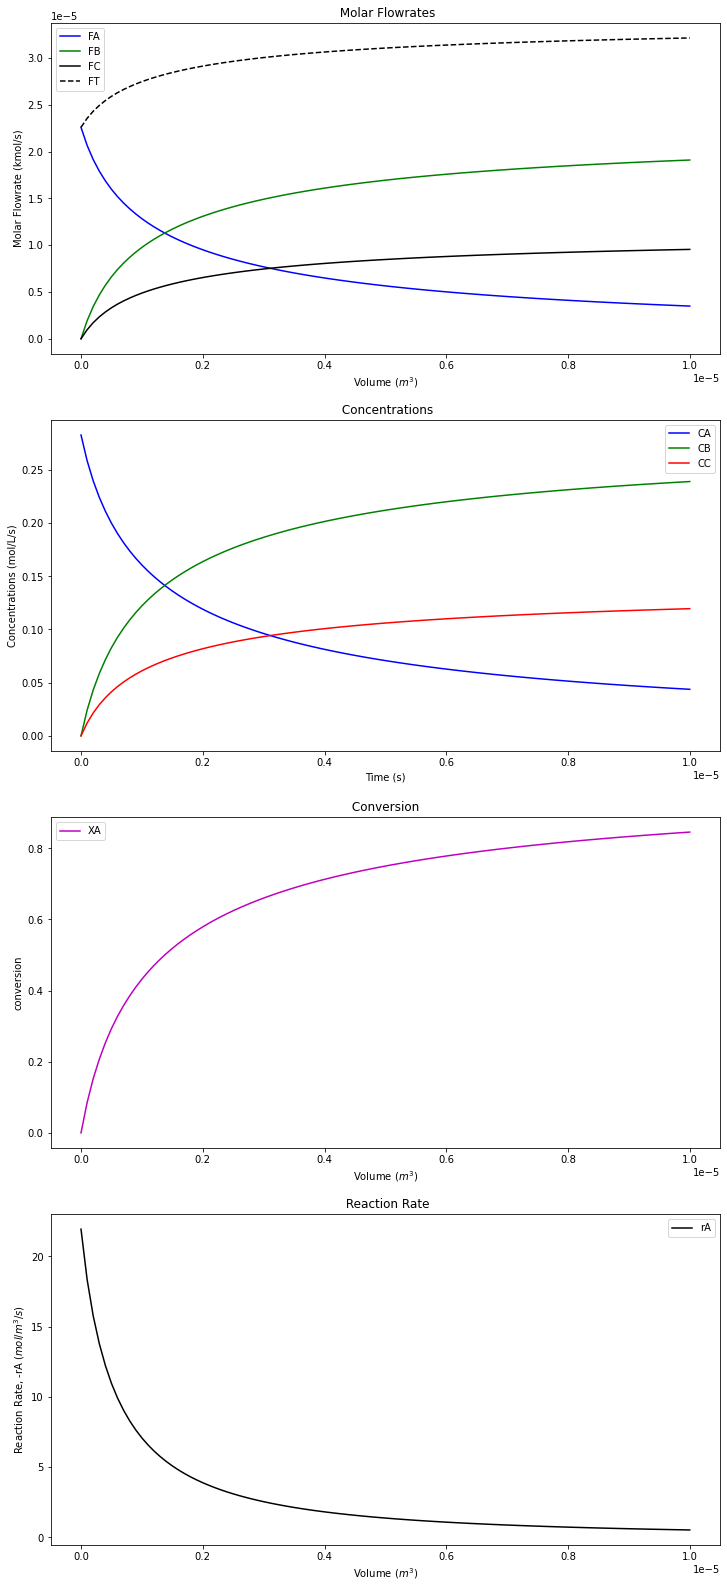

In [14]:
#print graphs of  moles, concentrations, V, and rEA
numrows=101
F0=[Fao,0,0]# Initial values for the N's 
tspan=(0,1e-5)# start and end of the integration
teval=np.linspace(tspan[0],tspan[1],numrows)
sol=solve_ivp(ODEfun,tspan,F0,t_eval=teval,method='DOP853')    
#Making a table of numbers including Equilibrium Conversion
T = 698 
Ea = 24000

P0=1641
Cto = P0 / 8.314 / T     
vo = Fao / Cto 
print('vo=',vo)
k=0.29 * np.exp(Ea/1.987* (1/500-1/T)) 
print('k=',k)


FT=np.zeros(numrows)
CA=np.zeros(numrows)
CB=np.zeros(numrows)
CC=np.zeros(numrows)
XA=np.zeros(numrows)
rA=np.zeros(numrows)

#load arrays
row=0
for row in range(numrows):
    
    FT[row]=sol.y[0,row]+sol.y[1,row]+sol.y[2,row]
    CA[row]=sol.y[0,row]/vo
    CB[row]=sol.y[1,row]/vo
    CC[row]=sol.y[2,row]/vo
    XA[row]=(sol.y[0,0]-sol.y[0,row])/sol.y[0,0]
    rA[row] = -k*CA[row]**2
   

plt.figure(figsize=(12,28))

plt.subplot (4,1,1)
plt.plot(sol.t,sol.y[0],'b',label='FA')
plt.plot(sol.t,sol.y[1],'g',label='FB')
plt.plot(sol.t,sol.y[2],'k',label='FC')
plt.plot(sol.t,FT,'k',linestyle='--',label='FT')

plt.legend()
plt.title(' Molar Flowrates')
plt.xlabel('Volume $(m^3)$')
plt.ylabel('Molar Flowrate (kmol/s)')

plt.subplot (4,1,2)
plt.plot(sol.t,CA,'b',label='CA')
plt.plot(sol.t,CB,'g',label='CB')
plt.plot(sol.t,CC,'r',label='CC')



plt.legend()
plt.title(' Concentrations')
plt.xlabel('Time (s)')
plt.ylabel('Concentrations (mol/L/s)')

plt.subplot (4,1,3)
plt.plot(sol.t,XA,'m',label='XA')

plt.legend()
plt.title(' Conversion ')
plt.xlabel('Volume ($m^3$)')
plt.ylabel('conversion')

plt.subplot (4,1,4)
plt.plot(sol.t,-rA,'k',label='rA')

plt.legend()
plt.title(' Reaction Rate')
plt.xlabel('Volume ($m^3$)')
plt.ylabel('Reaction Rate, -rA ($mol/m^3/s$)')

Which to use?
from:  https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
        
Explicit Runge-Kutta methods (‘RK23’, ‘RK45’, ‘DOP853’) should be used for non-stiff problems and implicit methods (‘Radau’, ‘BDF’) for stiff problems [9]. Among Runge-Kutta methods, ‘DOP853’ is recommended for solving with high precision (low values of rtol and atol).

If not sure, first try to run ‘RK45’. If it makes unusually many iterations, diverges, or fails, your problem is likely to be stiff and you should use ‘Radau’ or ‘BDF’. ‘LSODA’ can also be a good universal choice, but it might be somewhat less convenient to work with as it wraps old Fortran code.

You can also pass an arbitrary class derived from OdeSolver which implements the solver.

In [ ]:
# Using FA0=22.6 micro mol/s and changing units of R and k

In [24]:
#This function is to return the values of the 2 derivatives for the reaction A => B with first order kinetics
def  ODEfun(V,Yfuncvec):#fun(t,y) and return dy/dt
       
    Fa= Yfuncvec[0]
    Fb= Yfuncvec[1]
    Fc= Yfuncvec[2]
    
    #Explicit equations 
    T = 698 #K
    Ea = 24000#cal/mol
    P0=1641#kPa
    R=8.314e-6#(kPa micro mol)/L/s
    Cto = P0 / R / T 
    Ft = Fa + Fb + Fc 
    Ca = Cto * Fa / Ft 
    k=0.29e-6 * np.exp(Ea/1.987* (1/500-1/T))#L/micro-mol/s     
    vo = Fao / Cto 
    Tau = V / vo 
    ra =-(k * Ca**2) 
    X = 1 -(Fa / Fao) 
    rb = -ra 
    rc = -(ra / 2) 
      
    #Differential equations
    dFadV = ra 
    dFbdV = rb 
    dFcdV = rc  
      
    dYfuncvecdV = [dFadV, dFbdV, dFcdV] 
    return dYfuncvecdV   

In [25]:
#test of function ODEfun.  This will return values of dFA/dV=rA and dFB/dV=-rA at a value of V
Fao = 22.6
F0=[Fao,0,0]# Initial values for the N's 
tspan=(0,1e-5)# start and end of the integration

sol=ODEfun(0,F0)#Evaluates the derivatives at t=0s
print (sol)

[-21943973.181044802, 21943973.181044802, 10971986.590522401]


In [26]:
#test of solve_ivp function (python ODE solver from scipy library)

#The inputs to solve_ivp are the functions in ODEfun, the integration start&stop, 
#and the initial values of all the moles Ni
sol=solve_ivp(ODEfun,tspan,F0) 
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 68
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 4.07577793e-11, 4.48335572e-10, 4.52411350e-09,
       4.52818928e-08, 3.07561281e-07, 7.53249433e-07, 1.52505618e-06,
       2.81280976e-06, 4.92044617e-06, 8.28537908e-06, 1.00000000e-05])
 t_events: None
        y: array([[2.26000000e+01, 2.25991057e+01, 2.25901682e+01, 2.25013719e+01,
        2.16670198e+01, 1.78366939e+01, 1.41742178e+01, 1.08068686e+01,
        7.97311000e+00, 5.71896536e+00, 4.01721309e+00, 3.50125450e+00],
       [0.00000000e+00, 8.94334527e-04, 9.83184468e-03, 9.86280921e-02,
        9.32980158e-01, 4.76330612e+00, 8.42578225e+00, 1.17931314e+01,
        1.46268900e+01, 1.68810346e+01, 1.85827869e+01, 1.90987455e+01],
       [0.00000000e+00, 4.47167263e-04, 4.91592234e-03, 4.93140461e-02,
        4.66490079e-01, 2.38165306e+00, 4.21289112e+00, 5.89656571e+00,
   

Text(0, 0.5, 'Molar Flowrate (kmol/s)')

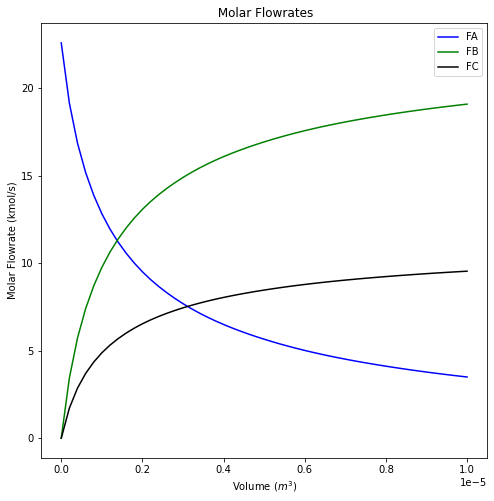

In [27]:
numrows=51
teval=np.linspace(tspan[0],tspan[1],numrows)
sol=solve_ivp(ODEfun,tspan,F0,t_eval=teval)
plt.figure(figsize=(8,8))

plt.subplot (1,1,1)
plt.plot(sol.t,sol.y[0],'b',label='FA')
plt.plot(sol.t,sol.y[1],'g',label='FB')
plt.plot(sol.t,sol.y[2],'k',label='FC')

plt.legend()
plt.title(' Molar Flowrates')
plt.xlabel('Volume $(m^3)$')
plt.ylabel('Molar Flowrate (kmol/s)')

In [30]:
#Making a table of numbers 

numrows=21
F0=[Fao,0,0]# Initial values for the N's 
tspan=(0,1e-5)# start and end of the integration

teval=np.linspace(tspan[0],tspan[1],numrows)

sol=solve_ivp(ODEfun,tspan,F0,t_eval=teval)


# print a table
print('Solution using default solver_ivp settings (RK45)')
print('    V         FA        FB          FC          ')
print('  (m^3)    (kmol/s)  (kmol/s)   (kmol/s)     ')    

row=0
for row in range(numrows):
      print('{:8.2e} {:10.3f} {:10.3f} {:10.3f} '.format(sol.t[row],
                            sol.y[0,row],sol.y[1,row],sol.y[2,row] ))

Solution 
    V         FA        FB          FC          
  (m^3)    (kmol/s)  (kmol/s)   (kmol/s)     
0.00e+00     22.600      0.000      0.000 
5.00e-07     15.979      6.621      3.310 
1.00e-06     12.836      9.764      4.882 
1.50e-06     10.881     11.719      5.859 
2.00e-06      9.513     13.087      6.543 
2.50e-06      8.489     14.111      7.055 
3.00e-06      7.686     14.914      7.457 
3.50e-06      7.037     15.563      7.782 
4.00e-06      6.498     16.102      8.051 
4.50e-06      6.043     16.557      8.279 
5.00e-06      5.652     16.948      8.474 
5.50e-06      5.313     17.287      8.643 
6.00e-06      5.015     17.585      8.793 
6.50e-06      4.751     17.849      8.925 
7.00e-06      4.515     18.085      9.043 
7.50e-06      4.303     18.297      9.149 
8.00e-06      4.111     18.489      9.245 
8.50e-06      3.936     18.664      9.332 
9.00e-06      3.777     18.823      9.412 
9.50e-06      3.630     18.970      9.485 
1.00e-05      3.495     19.105     

In [31]:
#Making a table of numbers 

numrows=21
F0=[Fao,0,0]# Initial values for the N's 
tspan=(0,1e-5)# start and end of the integration

teval=np.linspace(tspan[0],tspan[1],numrows)

sol=solve_ivp(ODEfun,tspan,F0,t_eval=teval, method='DOP853')


# print a table
print('Solution Using the DOP853 method setting in solve_ivp')
print('    V         FA        FB          FC          ')
print('  (m^3)    (kmol/s)  (kmol/s)   (kmol/s)     ')    

row=0
for row in range(numrows):
      print('{:8.2e} {:10.3f} {:10.3f} {:10.3f} '.format(sol.t[row],
                            sol.y[0,row],sol.y[1,row],sol.y[2,row] ))

Solution Using the DOP853 method setting in solve_ivp
    V         FA        FB          FC          
  (m^3)    (kmol/s)  (kmol/s)   (kmol/s)     
0.00e+00     22.600      0.000      0.000 
5.00e-07     15.979      6.621      3.310 
1.00e-06     12.836      9.764      4.882 
1.50e-06     10.881     11.719      5.859 
2.00e-06      9.513     13.087      6.543 
2.50e-06      8.489     14.111      7.055 
3.00e-06      7.686     14.914      7.457 
3.50e-06      7.037     15.563      7.782 
4.00e-06      6.498     16.102      8.051 
4.50e-06      6.043     16.557      8.279 
5.00e-06      5.652     16.948      8.474 
5.50e-06      5.313     17.287      8.643 
6.00e-06      5.015     17.585      8.793 
6.50e-06      4.751     17.849      8.925 
7.00e-06      4.515     18.085      9.043 
7.50e-06      4.303     18.297      9.149 
8.00e-06      4.111     18.489      9.245 
8.50e-06      3.936     18.664      9.332 
9.00e-06      3.777     18.823      9.412 
9.50e-06      3.630     18.970    

For more information on solve_ivp see https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html